In [2]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [3]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
data = drive.CreateFile({'id':'1hvw5l_mftdHked4tTmTJhbyhh-eJr9zO'})
data.GetContentFile('Life Expectancy Data.csv')
wholeData = pd.read_csv("Life Expectancy Data.csv")

In [6]:
wholeData.head()

,Country,Year,Gender,Life Expectancy at birth,BMI,Alcohol,Tuberculosis,Syphilis,Chlamydia,Gonorrhoea,...,Poisonings,Falls,"Fire, heat and hot substances",Drowning,Exposure to mechanical forces,Natural disasters,Other unintentional injuries,Self-harm,Interpersonal violence,Collective violence and legal intervention
0,Afghanistan,2019,Male,63.29,NaN,0.003,4.454469,0.050986,0.000000,0.000321,...,0.057880,0.620751,0.151339,0.801665,1.545577,0.067079,2.008284,0.904954,2.595521,12.843526
1,Afghanistan,2019,Female,63.16,NaN,0.022,5.384610,0.043190,0.001424,0.004201,...,0.325711,0.284562,0.196666,0.194389,0.056229,0.067360,1.233210,0.667653,0.621160,12.776039
2,Afghanistan,2015,Male,61.04,22.5,0.002,6.109258,0.056666,0.000000,0.000277,...,3.980983,0.056828,0.570412,0.151665,0.769096,1.382456,0.286633,0.768236,2.553344,16.771404
3,Afghanistan,2015,Female,62.35,24.0,0.014,7.384937,0.047379,0.001201,0.003568,...,0.310311,0.322669,0.183147,0.251741,0.052141,0.172981,1.203843,0.597401,0.576237,7.570893
4,Afghanistan,2010,Male,59.60,22.1,0.006,5.652315,0.051922,0.000000,0.000243,...,0.087785,0.697883,0.235376,1.370172,1.611014,0.219533,2.513913,0.692336,2.233730,5.684718


In [7]:
myShare = wholeData.iloc[:, 75:100]

In [8]:
myShare.head().columns
len(myShare.head().columns)

25

In [9]:
myShare.describe()

,Thyroid cancer,Hodgkin lymphoma,Non-Hodgkin lymphoma,Multiple myeloma,Leukaemia,Diabetes mellitus,"Endocrine, blood, immune disorders",Depressive disorders,Bipolar disorder,Schizophrenia,...,Childhood behavioural disorders,Idiopathic intellectual disability,Alzheimer disease and other dementias,Parkinson disease,Epilepsy,Multiple sclerosis,Migraine,Non-migraine headache,Other neurological conditions,Sense organ diseases
count,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.0,1464.000000,1464.000000,...,1464.0,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000
mean,0.096005,0.067645,0.583453,0.245862,0.787614,3.308935,0.740790,0.0,0.001873,0.012208,...,0.0,0.004304,2.804489,0.887419,0.369685,0.092531,0.005919,0.000009,0.354131,0.061641
std,0.336963,0.219495,1.902992,0.760813,2.715685,10.654477,2.029780,0.0,0.009388,0.045955,...,0.0,0.019263,13.028603,4.246083,1.774441,0.503278,0.056483,0.000176,1.327452,0.581849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.003830,0.001316,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000041,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003440,0.002782,0.020927,0.005488,0.024305,0.209196,0.039416,0.0,0.000000,0.000000,...,0.0,0.000000,0.023203,0.023606,0.018854,0.002093,0.000000,0.000000,0.004744,0.000000
50%,0.015922,0.016312,0.109380,0.032157,0.131245,0.738457,0.140820,0.0,0.000000,0.000000,...,0.0,0.000000,0.210720,0.109696,0.072566,0.009881,0.000000,0.000000,0.032286,0.000000
75%,0.051271,0.049447,0.336200,0.150921,0.474189,1.969636,0.535288,0.0,0.000000,0.001398,...,0.0,0.000000,1.018584,0.349203,0.220162,0.044241,0.000000,0.000000,0.153928,0.000907
max,4.239409,3.097882,27.966627,8.286548,33.856286,142.083732,23.545706,0.0,0.143758,0.578077,...,0.0,0.247977,198.170440,84.928031,38.104545,15.338455,1.423862,0.005252,22.294082,17.416745


In [10]:
myShare["Life Expectancy at birth"] = wholeData["Life Expectancy at birth"]

In [11]:
myShare.head()

,Thyroid cancer,Hodgkin lymphoma,Non-Hodgkin lymphoma,Multiple myeloma,Leukaemia,Diabetes mellitus,"Endocrine, blood, immune disorders",Depressive disorders,Bipolar disorder,Schizophrenia,...,Idiopathic intellectual disability,Alzheimer disease and other dementias,Parkinson disease,Epilepsy,Multiple sclerosis,Migraine,Non-migraine headache,Other neurological conditions,Sense organ diseases,Life Expectancy at birth
0,0.014403,0.109079,0.440958,0.037212,0.341815,1.524383,0.687194,0,0.0,0.0,...,0.0,0.782333,0.342579,0.546307,0.034755,0.000000,0.0,0.115656,0.000000,63.29
1,0.030097,0.064480,0.262312,0.032002,0.268440,4.225173,0.676683,0,0.0,0.0,...,0.0,0.982525,0.284960,0.446325,0.049168,0.000000,0.0,0.061788,0.000000,63.16
2,0.011947,0.098949,0.377003,0.032268,0.290146,1.281742,0.634117,0,0.0,0.0,...,0.0,0.000000,0.645052,0.288208,0.514551,0.028784,0.0,0.000000,0.103746,61.04
3,0.027288,0.057795,0.234851,0.028820,0.260443,3.386318,0.600090,0,0.0,0.0,...,0.0,0.808601,0.230916,0.408465,0.040734,0.000000,0.0,0.049903,0.000000,62.35
4,0.010690,0.092166,0.325452,0.026854,0.321423,1.045922,0.623676,0,0.0,0.0,...,0.0,0.532145,0.245824,0.552847,0.024339,0.000000,0.0,0.094605,0.000000,59.60


In [12]:
myShare.dtypes

Thyroid cancer                           float64
Hodgkin lymphoma                         float64
Non-Hodgkin lymphoma                     float64
Multiple myeloma                         float64
Leukaemia                                float64
Diabetes mellitus                        float64
Endocrine, blood, immune disorders       float64
Depressive disorders                       int64
Bipolar disorder                         float64
Schizophrenia                            float64
Alcohol use disorders                    float64
Drug use disorders                       float64
Anxiety disorders                        float64
Eating disorders                         float64
Autism and Asperger syndrome               int64
Childhood behavioural disorders            int64
Idiopathic intellectual disability       float64
Alzheimer disease and other dementias    float64
Parkinson disease                        float64
Epilepsy                                 float64
Multiple sclerosis  

In [13]:
myShare.corr().style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Thyroid cancer,Hodgkin lymphoma,Non-Hodgkin lymphoma,Multiple myeloma,Leukaemia,Diabetes mellitus,"Endocrine, blood, immune disorders",Depressive disorders,Bipolar disorder,Schizophrenia,Alcohol use disorders,Drug use disorders,Anxiety disorders,Eating disorders,Autism and Asperger syndrome,Childhood behavioural disorders,Idiopathic intellectual disability,Alzheimer disease and other dementias,Parkinson disease,Epilepsy,Multiple sclerosis,Migraine,Non-migraine headache,Other neurological conditions,Sense organ diseases,Life Expectancy at birth
Thyroid cancer,1.000000,0.788097,0.862759,0.762661,0.885500,0.881666,0.671430,nan,0.193008,0.250743,0.468873,0.470073,0.159290,0.796952,nan,nan,0.221483,0.670900,0.727910,0.745301,0.473586,0.248418,0.010738,0.451221,0.166437,0.126049
Hodgkin lymphoma,0.788097,1.000000,0.791161,0.689776,0.840988,0.853451,0.620540,nan,0.140354,0.154605,0.699551,0.499139,0.160010,0.542113,nan,nan,0.205179,0.496742,0.687461,0.815723,0.558163,0.304951,0.019821,0.392433,0.187077,0.027173
Non-Hodgkin lymphoma,0.862759,0.791161,1.000000,0.923610,0.939495,0.764293,0.803929,nan,0.357500,0.416836,0.572429,0.672817,0.346289,0.642286,nan,nan,0.475802,0.693961,0.846048,0.714434,0.559766,0.379152,0.039332,0.624297,0.304269,0.126691
Multiple myeloma,0.762661,0.689776,0.923610,1.000000,0.853477,0.670365,0.883863,nan,0.552924,0.598367,0.508965,0.786927,0.526795,0.506059,nan,nan,0.703012,0.767681,0.775201,0.584039,0.528171,0.383701,0.069145,0.790892,0.360389,0.202843
Leukaemia,0.885500,0.840988,0.939495,0.853477,1.000000,0.792504,0.751778,nan,0.262346,0.294728,0.567070,0.632382,0.275753,0.752008,nan,nan,0.350973,0.713041,0.818508,0.723879,0.497618,0.319215,0.034048,0.535993,0.247354,0.111198
Diabetes mellitus,0.881666,0.853451,0.764293,0.670365,0.792504,1.000000,0.652749,nan,0.132639,0.163950,0.465907,0.424114,0.167592,0.661663,nan,nan,0.185507,0.555480,0.643867,0.755739,0.516796,0.257373,0.017752,0.394936,0.164940,0.038680
"Endocrine, blood, immune disorders",0.671430,0.620540,0.803929,0.883863,0.751778,0.652749,1.000000,nan,0.551461,0.591307,0.381360,0.764340,0.547264,0.431557,nan,nan,0.687711,0.730870,0.648594,0.521397,0.463998,0.299260,0.057481,0.791405,0.315657,0.085286
Depressive disorders,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Bipolar disorder,0.193008,0.140354,0.357500,0.552924,0.262346,0.132639,0.551461,nan,1.000000,0.812812,0.103862,0.409102,0.456815,-0.030623,nan,nan,0.743811,0.474224,0.240375,0.086740,0.228085,0.127517,0.083175,0.646303,0.184961,0.235107
Schizophrenia,0.250743,0.154605,0.416836,0.598367,0.294728,0.163950,0.591307,nan,0.812812,1.000000,0.136689,0.377359,0.527837,-0.040786,nan,nan,0.772618,0.396327,0.265508,0.104912,0.209956,0.148292,0.094769,0.690526,0.261918,0.271677


Doesnt look like any of these categories are very correlated to life expectancy in this dataset

In [14]:
myShare.shape

(1464, 26)

array([[<Axes: title={'center': 'Thyroid cancer'}>,
        <Axes: title={'center': 'Hodgkin lymphoma'}>,
        <Axes: title={'center': 'Non-Hodgkin lymphoma'}>,
        <Axes: title={'center': 'Multiple myeloma'}>,
        <Axes: title={'center': 'Leukaemia'}>],
       [<Axes: title={'center': 'Diabetes mellitus'}>,
        <Axes: title={'center': 'Endocrine, blood, immune disorders'}>,
        <Axes: title={'center': 'Depressive disorders'}>,
        <Axes: title={'center': 'Bipolar disorder'}>,
        <Axes: title={'center': 'Schizophrenia'}>],
       [<Axes: title={'center': 'Alcohol use disorders'}>,
        <Axes: title={'center': 'Drug use disorders'}>,
        <Axes: title={'center': 'Anxiety disorders'}>,
        <Axes: title={'center': 'Eating disorders'}>,
        <Axes: title={'center': 'Autism and Asperger syndrome'}>],
       [<Axes: title={'center': 'Childhood behavioural disorders'}>,
        <Axes: title={'center': 'Idiopathic intellectual disability'}>,
        <Ax

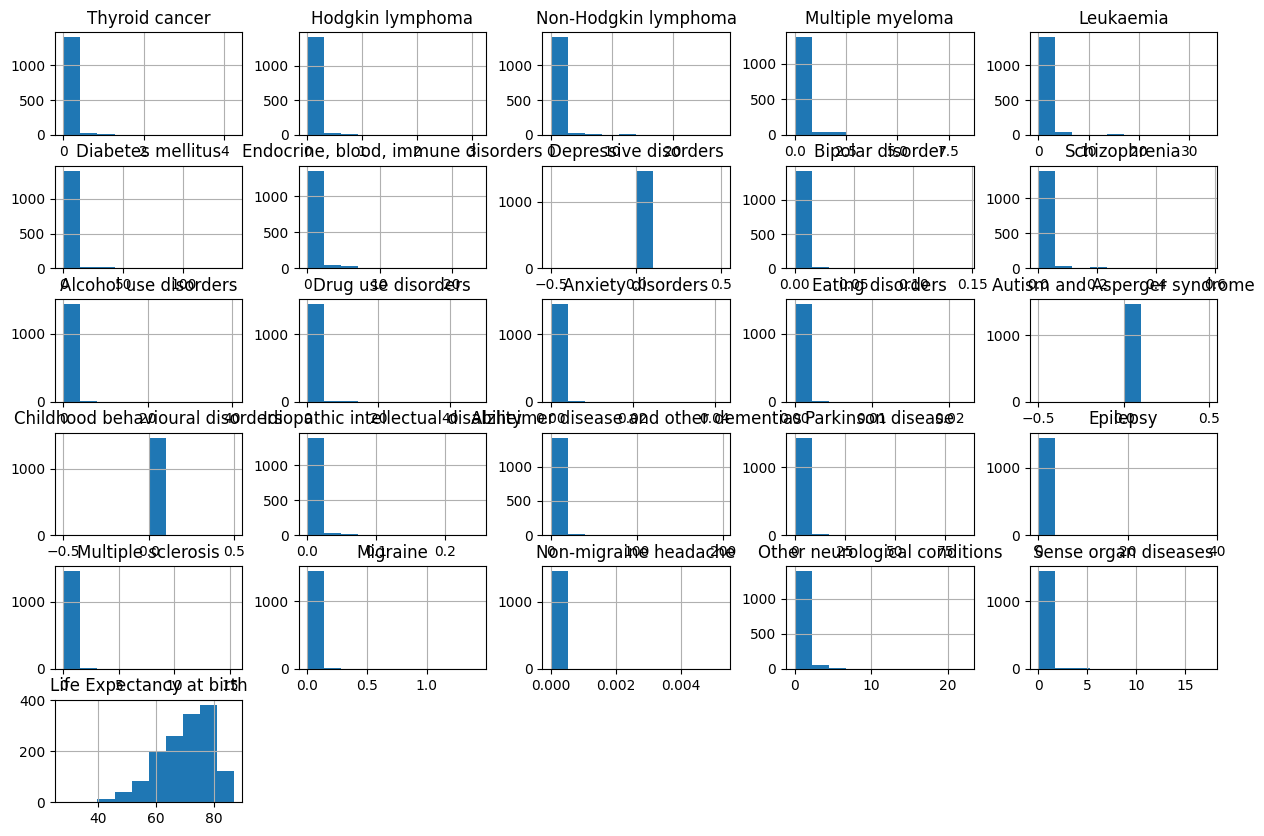

In [15]:
myShare.hist(bins=10, figsize=(15, 10))

In [16]:
columnNames = myShare.columns

In [19]:
myShare.isna().sum()

Thyroid cancer                            0
Hodgkin lymphoma                          0
Non-Hodgkin lymphoma                      0
Multiple myeloma                          0
Leukaemia                                 0
Diabetes mellitus                         0
Endocrine, blood, immune disorders        0
Depressive disorders                      0
Bipolar disorder                          0
Schizophrenia                             0
Alcohol use disorders                     0
Drug use disorders                        0
Anxiety disorders                         0
Eating disorders                          0
Autism and Asperger syndrome              0
Childhood behavioural disorders           0
Idiopathic intellectual disability        0
Alzheimer disease and other dementias     0
Parkinson disease                         0
Epilepsy                                  0
Multiple sclerosis                        0
Migraine                                  0
Non-migraine headache           

In [20]:
data = drive.CreateFile({'id':'1jgwj1XdlXE0hTarZ5R79yjaoCogRqVuC'})
data.GetContentFile('life_exp_cleaned.csv')
newwholeData = pd.read_csv("life_exp_cleaned.csv")

In [21]:
newwholeData.head()

,Unnamed: 0,Life Expectancy at birth,BMI,Alcohol,Tuberculosis,Syphilis,Chlamydia,Gonorrhoea,Trichomoniasis,Genital herpes,...,2000,2010,2015,2019,Africa,Asia,Europe,North America,Oceania,South America
0,0,63.29,21.966667,0.003,4.454469,0.050986,0.000000,0.000321,0,0,...,0,0,0,1,0,1,0,0,0,0
1,1,63.16,23.166667,0.022,5.384610,0.043190,0.001424,0.004201,0,0,...,0,0,0,1,0,1,0,0,0,0
2,2,61.04,22.500000,0.002,6.109258,0.056666,0.000000,0.000277,0,0,...,0,0,1,0,0,1,0,0,0,0
3,3,62.35,24.000000,0.014,7.384937,0.047379,0.001201,0.003568,0,0,...,0,0,1,0,0,1,0,0,0,0
4,4,59.60,22.100000,0.006,5.652315,0.051922,0.000000,0.000243,0,0,...,0,1,0,0,0,1,0,0,0,0


In [22]:
newwholeData.columns

Index(['Unnamed: 0', 'Life Expectancy at birth', 'BMI', 'Alcohol',
       'Tuberculosis', 'Syphilis', 'Chlamydia', 'Gonorrhoea', 'Trichomoniasis',
       'Genital herpes',
       ...
       '2000', '2010', '2015', '2019', 'Africa', 'Asia', 'Europe',
       'North America', 'Oceania', 'South America'],
      dtype='object', length=156)

In [23]:
newwholeData.iloc[:, 20:40]

,Acute hepatitis B,Acute hepatitis C,Acute hepatitis E,Malaria,African Trypanosomiasis,Chagas disease,Schistosomiasis,Leishmaniasis,lymphatic filariasis,Onchocerciasis,Cysticercosis,Echinococcosis,Dengue,Trachoma,Yellow fever,Rabies,Ascariasis,Trichuriasis,Hookworm disease,Food-bourne trematodes
0,0.525569,0.013418,0.005477,0.088065,0.000000,0.0,0.000000,0.000964,0.0,0.0,0.000000,0.319315,0.000042,0.0,0.0,0.068982,0.009319,0.0,0.0,0
1,0.337891,0.014393,0.004179,0.097386,0.000000,0.0,0.000000,0.000398,0.0,0.0,0.000000,0.259684,0.000076,0.0,0.0,0.011380,0.007561,0.0,0.0,0
2,0.498117,0.013284,0.005220,0.084208,0.000000,0.0,0.000000,0.000862,0.0,0.0,0.000000,0.389015,0.000038,0.0,0.0,0.074105,0.012212,0.0,0.0,0
3,0.324563,0.015030,0.004146,0.089156,0.000000,0.0,0.000000,0.000345,0.0,0.0,0.000000,0.303527,0.000066,0.0,0.0,0.011880,0.009301,0.0,0.0,0
4,0.519827,0.015236,0.005242,0.081977,0.000000,0.0,0.000000,0.001608,0.0,0.0,0.000000,0.627713,0.000041,0.0,0.0,0.106203,0.017208,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,0.016324,0.012092,0.006751,1.340309,0.004322,0.0,0.106139,0.000000,0.0,0.0,0.058670,0.007580,0.000077,0.0,0.0,0.022788,0.001191,0.0,0.0,0
1424,0.063221,0.005627,0.008340,1.514735,0.002278,0.0,0.162038,0.000000,0.0,0.0,0.053563,0.006781,0.000127,0.0,0.0,0.064332,0.001391,0.0,0.0,0
1425,0.020996,0.013975,0.007731,1.340810,0.003979,0.0,0.148596,0.000000,0.0,0.0,0.088709,0.010636,0.000067,0.0,0.0,0.031153,0.001291,0.0,0.0,0
1426,0.031172,0.003008,0.004736,1.672326,0.000000,0.0,0.068125,0.000000,0.0,0.0,0.066702,0.010165,0.000071,0.0,0.0,0.059491,0.000600,0.0,0.0,0


In [24]:
newwholeData.columns.values.tolist()

['Unnamed: 0',
 'Life Expectancy at birth',
 'BMI',
 'Alcohol',
 'Tuberculosis',
 'Syphilis',
 'Chlamydia',
 'Gonorrhoea',
 'Trichomoniasis',
 'Genital herpes',
 'Other STDs',
 'HIV/AIDS',
 'Diarrhoeal diseases',
 'Whooping cough',
 'Diphtheria',
 'Measles',
 'Tetanus',
 'Meningitis',
 'Encephalitis',
 'Acute hepatitis A',
 'Acute hepatitis B',
 'Acute hepatitis C',
 'Acute hepatitis E',
 'Malaria',
 'African Trypanosomiasis',
 'Chagas disease',
 'Schistosomiasis',
 'Leishmaniasis',
 'lymphatic filariasis',
 'Onchocerciasis',
 'Cysticercosis',
 'Echinococcosis',
 'Dengue',
 'Trachoma',
 'Yellow fever',
 'Rabies',
 'Ascariasis',
 'Trichuriasis',
 'Hookworm disease',
 'Food-bourne trematodes',
 'Leprosy',
 'Lower respiratory infections',
 'Upper respiratory infections',
 'Otitis media',
 'Preterm birth complications',
 'Birth asphyxia and birth trauma',
 'Neonatal sepsis and infections',
 'Other neonatal conditions',
 'Protein-energy malnutrition',
 'Iodine deficiency',
 'Vitamin A defic

In [25]:
cardiovascular_disease_h = ["Rheumatic heart disease", "Hypertensive heart disease", "Ischaemic heart disease", "Stroke", "Cardiomyopathy, myocarditis, endocarditis", "Other circulatory diseases "]

In [26]:
respiratory_diseases_i = ['Chronic obstructive pulmonary disease','Asthma']

In [27]:
digestive_diseases_j = ['Peptic ulcer disease',
 'Cirrhosis of the liver',
 'Appendicitis',
 'Gastritis and duodenitis',
 'Paralytic ileus and intestinal obstruction',
 'Inflammatory bowel disease',
 'Gallbladder and biliary diseases',
 'Pancreatitis']

In [28]:
genitourinary_diseases_k = ['Kidney diseases',
 'Benign prostatic hyperplasia',
 'Urolithiasis',
 'Other urinary diseases',
 'Infertility',
 'Gynecological diseases']

In [29]:
# newwholeData["respiratory disease"] = newwholeData[respiratory_diseases_i].agg(sum

SyntaxError: ignored

In [ ]:
# def new_cat(df, col_name, col_list):
#     df[col_name] = df[col_list].sum(axis=1)
#     # df.drop(columns = col_list)

In [ ]:
# new_cat(newwholeData, "respiratory disease", respiratory_diseases_i)

In [30]:
# newwholeData['respiratory disease']

KeyError: ignored

In [127]:
data = drive.CreateFile({'id':'1Xb2802ZDwKdUUw8OiY_3m5LAPIl4zcij'})
data.GetContentFile('train_2019.csv')
train2019 = pd.read_csv("train_2019.csv")
train2019.head()

,Life Expectancy at birth,BMI,Alcohol,gender_dummy,Africa,Asia,Europe,North America,Oceania,South America,...,unintentional_injuries,intentional_injuries,mental_substance_disorders,sense_organ,musculoskeletal,congenital,sudden_infant_death_syndrome,skin_diseases,diabetes_mellitus,oral_conditions
0,78.46,25.300000,10.410,0,0,0,0,0,0,1,...,7.279972,3.130840,0.691484,0.0,0.049004,1.104351,0.035281,0.063372,2.046884,0.0
1,83.80,26.566667,3.690,1,0,0,1,0,0,0,...,0.036475,0.006813,0.002151,0.0,0.010247,0.007457,0.000129,0.015262,0.087618,0.0
2,63.29,21.966667,0.003,0,0,1,0,0,0,0,...,10.105453,16.344002,0.316492,0.0,0.055650,2.678251,0.241539,0.047643,1.524383,0.0
3,63.81,21.866667,14.550,0,1,0,0,0,0,0,...,1.523983,0.684801,0.080493,0.0,0.016751,0.411992,0.022004,0.017318,0.536057,0.0
4,69.52,21.166667,1.890,0,0,1,0,0,0,0,...,415.231969,140.292942,30.474057,0.0,9.034223,42.827642,1.376138,8.965338,142.083732,0.0


In [128]:
data = drive.CreateFile({'id':'1yTYHnxfH4HPbb22aS-NvE2nbHOmqGSDW'})
data.GetContentFile('test_2019.csv')
test2019 = pd.read_csv("test_2019.csv")
test2019.head()

,Life Expectancy at birth,BMI,Alcohol,gender_dummy,Africa,Asia,Europe,North America,Oceania,South America,...,unintentional_injuries,intentional_injuries,mental_substance_disorders,sense_organ,musculoskeletal,congenital,sudden_infant_death_syndrome,skin_diseases,diabetes_mellitus,oral_conditions
0,73.15,26.233333,19.51,0,0,0,1,0,0,0,...,0.128734,0.111741,0.016702,0.000000,0.002166,0.001918,0.000416,0.000410,0.080265,0.000000
1,71.65,26.366667,19.86,0,0,0,1,0,0,0,...,1.338603,0.583207,0.101881,0.000341,0.013641,0.090422,0.001492,0.025965,0.602669,0.001703
2,79.50,26.766667,4.64,1,0,0,0,0,0,1,...,4.297301,1.193641,0.420728,0.003014,0.829403,1.074075,0.071780,1.952417,3.141523,0.006000
3,65.93,25.866667,1.23,0,0,0,0,0,1,0,...,0.217982,0.069870,0.004404,0.000000,0.000775,0.072958,0.004140,0.011190,0.802776,0.000000
4,79.09,24.766667,2.96,1,0,0,1,0,0,0,...,0.266183,0.088910,0.013770,0.000000,0.036113,0.032305,0.000666,0.012021,1.407781,0.000000


In [129]:
X_train = train2019.drop(["Life Expectancy at birth"], axis=1)
y_train = train2019["Life Expectancy at birth"]
X_test = test2019.drop(["Life Expectancy at birth"], axis=1)
y_test = test2019["Life Expectancy at birth"]

In [130]:
dtr = DecisionTreeRegressor(min_samples_split=10, 
                            ccp_alpha=0.02,
                            random_state = 88)
dtr = dtr.fit(X_train, y_train)

Node count = 109


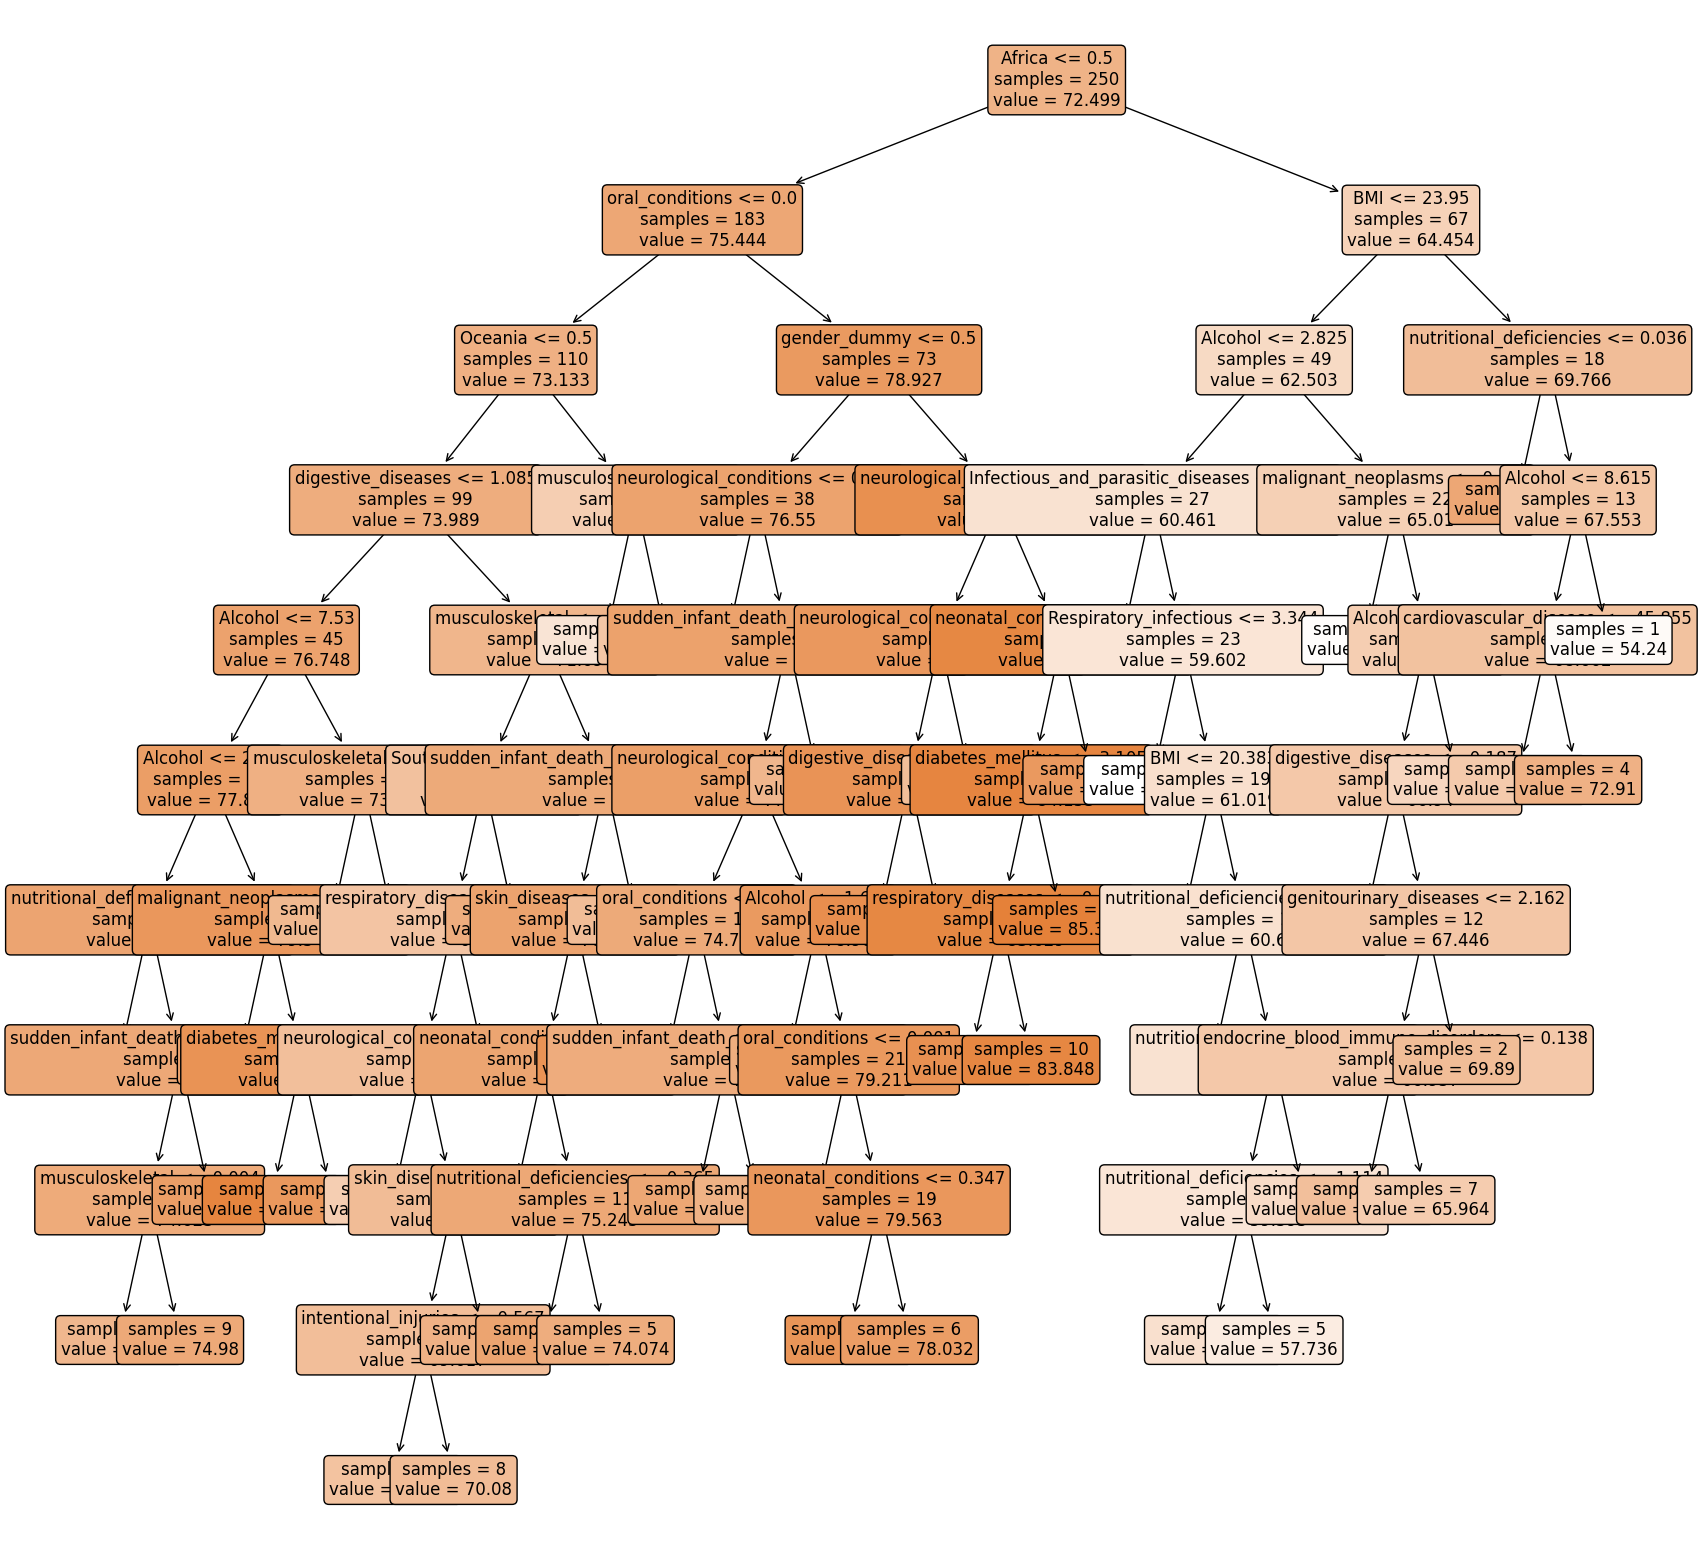

In [131]:
print('Node count =', dtr.tree_.node_count)
plt.figure(figsize=(20,20))
plot_tree(dtr, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12)
plt.show()

In [132]:
def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [133]:
print('OSR2:', OSR2(dtr, X_test, y_test, y_train))

OSR2: 0.46185048921308736


In [185]:
rf_cont = RandomForestRegressor()
rf_cont.fit(X_train, y_train)

RandomForestRegressor()

In [186]:
print('OSR2:', OSR2(rf_cont, X_test, y_test, y_train))

OSR2: 0.7153435866002515


In [187]:
grid_values = {'ccp_alpha': np.linspace(0, 0.10, 201),
               'min_samples_leaf': [5,10,20],
               'min_samples_split': [5,10,20],
               'max_depth': [10,20,30],
               'random_state': [88]}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

d_tree = DecisionTreeRegressor()
cross_val = GridSearchCV(d_tree, param_grid = grid_values, scoring = 'r2', cv=cv, verbose=0)
cross_val.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [135]:
print(cross_val.best_params_)

{'ccp_alpha': 0.0, 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20, 'random_state': 88}


In [136]:
d_tree_cv = DecisionTreeRegressor(ccp_alpha=0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88)
d_tree_cv.fit(X_train, y_train)

y_pred = d_tree_cv.predict(X_test)

Node count = 35


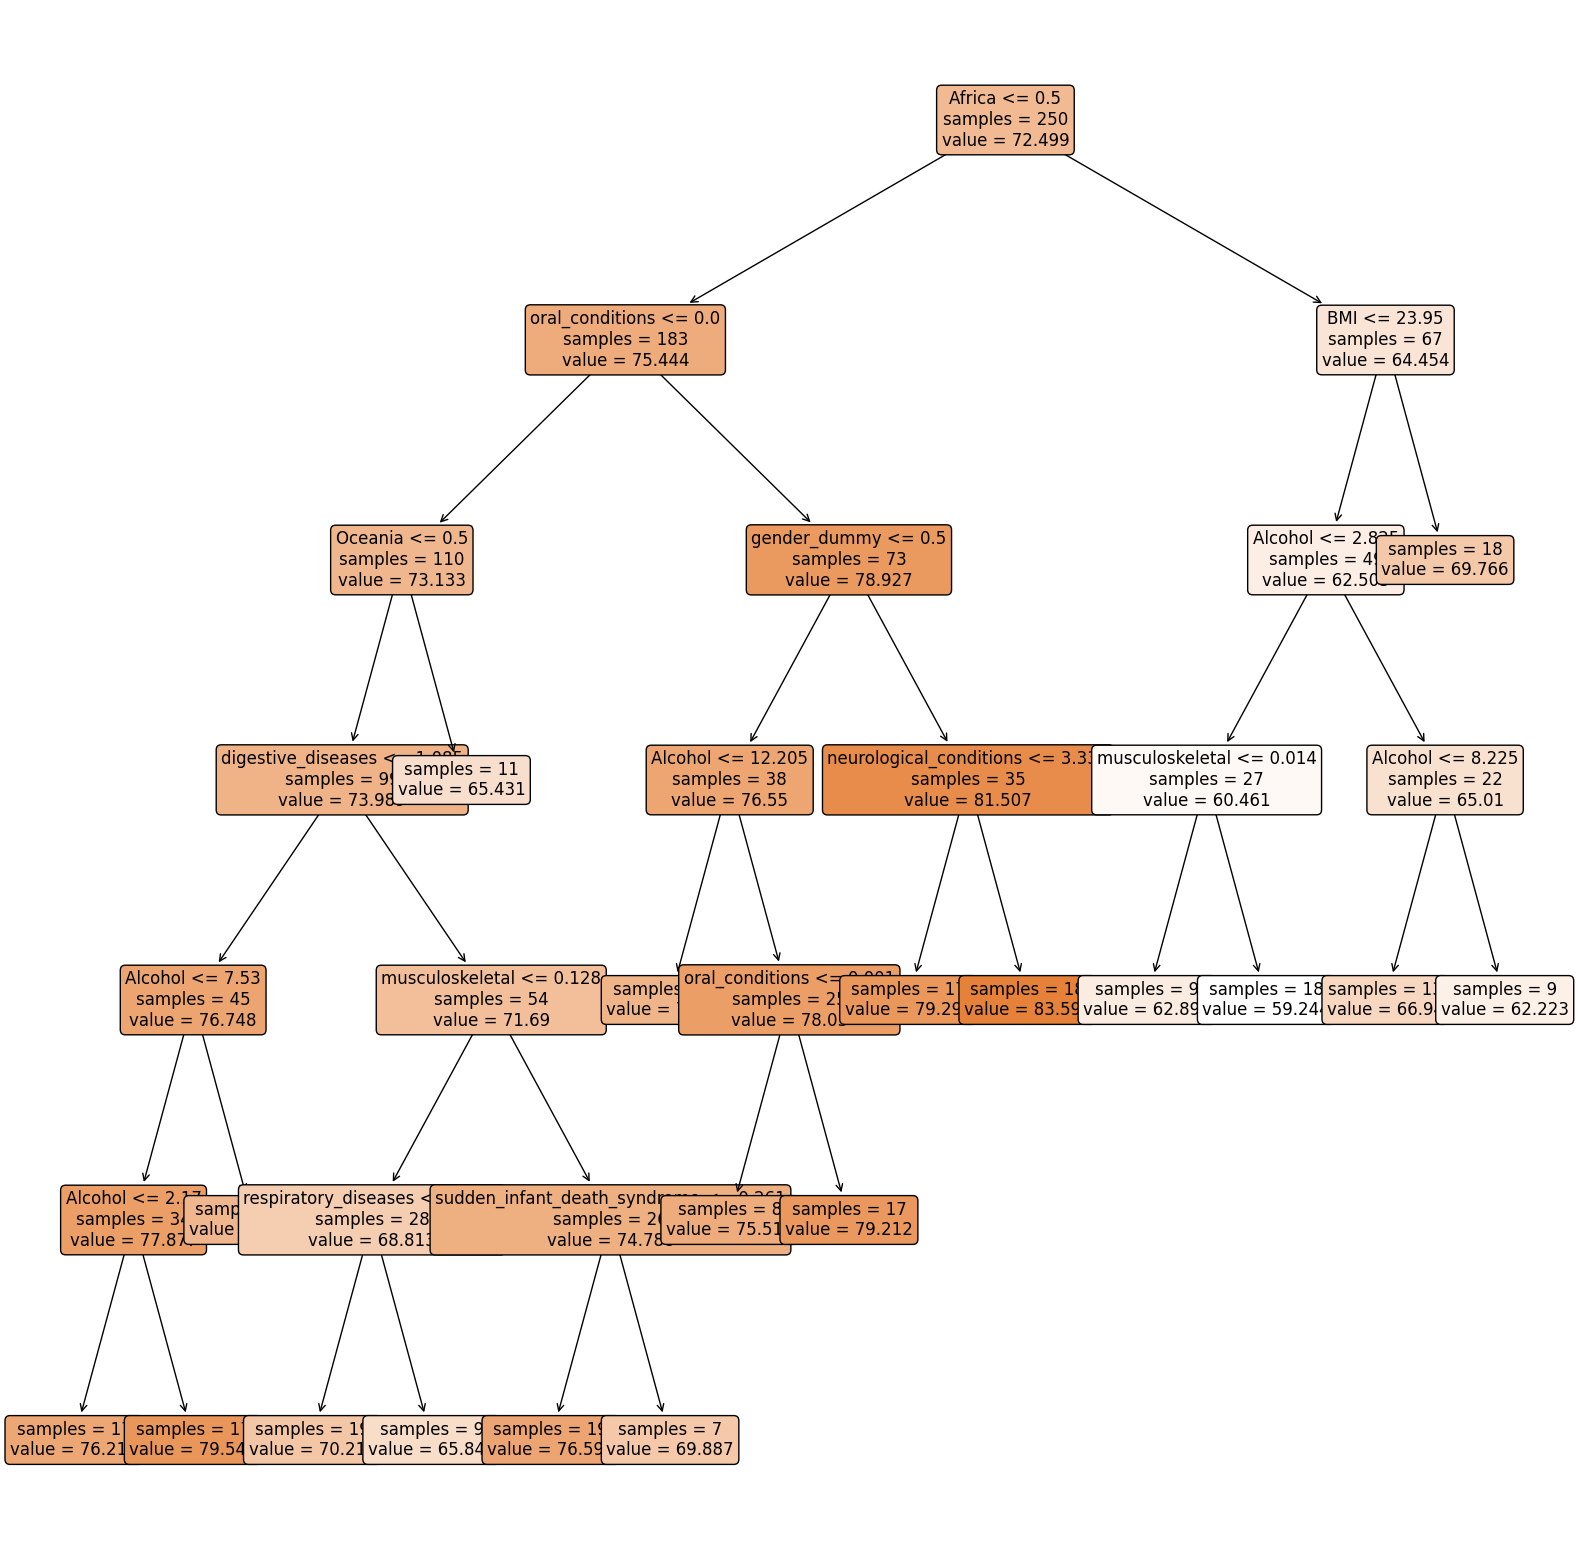

In [137]:
print('Node count =', d_tree_cv.tree_.node_count)
plt.figure(figsize=(20,20))
plot_tree(d_tree_cv, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12)
plt.show()

In [138]:
print('OSR2:', OSR2(d_tree_cv, X_test, y_test, y_train))

OSR2: 0.4829707321852955


In [139]:
features = d_tree_cv.feature_names_in_

In [140]:
features

array(['BMI', 'Alcohol', 'gender_dummy', 'Africa', 'Asia', 'Europe',
       'North America', 'Oceania', 'South America',
       'Infectious_and_parasitic_diseases', 'Respiratory_infectious',
       'neonatal_conditions', 'nutritional_deficiencies',
       'endocrine_blood_immune_disorders', 'cardiovascular_disease',
       'respiratory_diseases', 'digestive_diseases',
       'genitourinary_diseases', 'malignant_neoplasms',
       'neurological_conditions', 'unintentional_injuries',
       'intentional_injuries', 'mental_substance_disorders',
       'sense_organ', 'musculoskeletal', 'congenital',
       'sudden_infant_death_syndrome', 'skin_diseases',
       'diabetes_mellitus', 'oral_conditions'], dtype=object)

In [141]:
importance = d_tree_cv.feature_importances_
len(importance)

30

In [142]:
for x, y in zip(features, importance):
  print(x, y)

BMI 0.05865841460918318
Alcohol 0.06767089461735211
gender_dummy 0.03781456816420327
Africa 0.5004599822756178
Asia 0.0
Europe 0.0
North America 0.0
Oceania 0.061262039582544475
South America 0.0
Infectious_and_parasitic_diseases 0.0
Respiratory_infectious 0.0
neonatal_conditions 0.0
nutritional_deficiencies 0.0
endocrine_blood_immune_disorders 0.0
cardiovascular_disease 0.0
respiratory_diseases 0.0098693510578364
digestive_diseases 0.05305619636033952
genitourinary_diseases 0.0
malignant_neoplasms 0.0
neurological_conditions 0.013649399147461196
unintentional_injuries 0.0
intentional_injuries 0.0
mental_substance_disorders 0.0
sense_organ 0.0
musculoskeletal 0.04740822293085513
congenital 0.0
sudden_infant_death_syndrome 0.019436635127474178
skin_diseases 0.0
diabetes_mellitus 0.0
oral_conditions 0.13071429612713253


In [143]:
def importance_plot(tree, X_train):
    
    feature_importance = tree.feature_importances_ # get the importance of each feature
    
    #relative feature importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    
    # Save to a dataframe with two columns: One holding the names of the features, 
    # and one holding the associated relative importance of each feature.
    feat_df = pd.DataFrame({'feature':X_train.columns, 'importance':feature_importance})
    # Sort feat_df in order of importance
    feat_df = feat_df.sort_values(by='importance', ascending=True)
    
    # Bar plot 
    plt.figure(figsize=(8, 7.5))
    plt.barh(width=feat_df.importance, y=feat_df.feature)
    plt.xlabel('Relative feature importance');


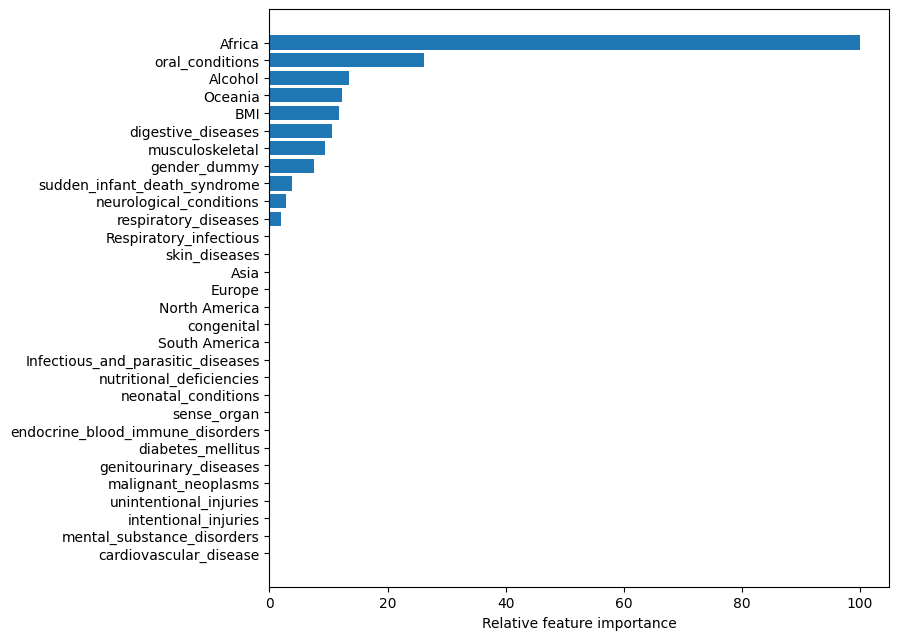

In [144]:
importance_plot(d_tree_cv, X_train)

In [179]:
X_train_noCont = train2019.drop(["Oceania", "Africa", "Europe", "North America", "South America", "Asia", "Life Expectancy at birth"], axis=1)
y_train_noCont = train2019["Life Expectancy at birth"]
X_test_noCont = test2019.drop(["Oceania", "Africa", "Europe", "North America", "South America", "Asia", "Life Expectancy at birth"], axis=1)
y_test_noCont = test2019["Life Expectancy at birth"]

In [146]:
d_tree_cv = DecisionTreeRegressor(ccp_alpha=0, max_depth=10, min_samples_leaf=5, min_samples_split=20, random_state=88)
d_tree_cv.fit(X_train_noCont, y_train_noCont)

y_pred = d_tree_cv.predict(X_test_noCont)

Node count = 39


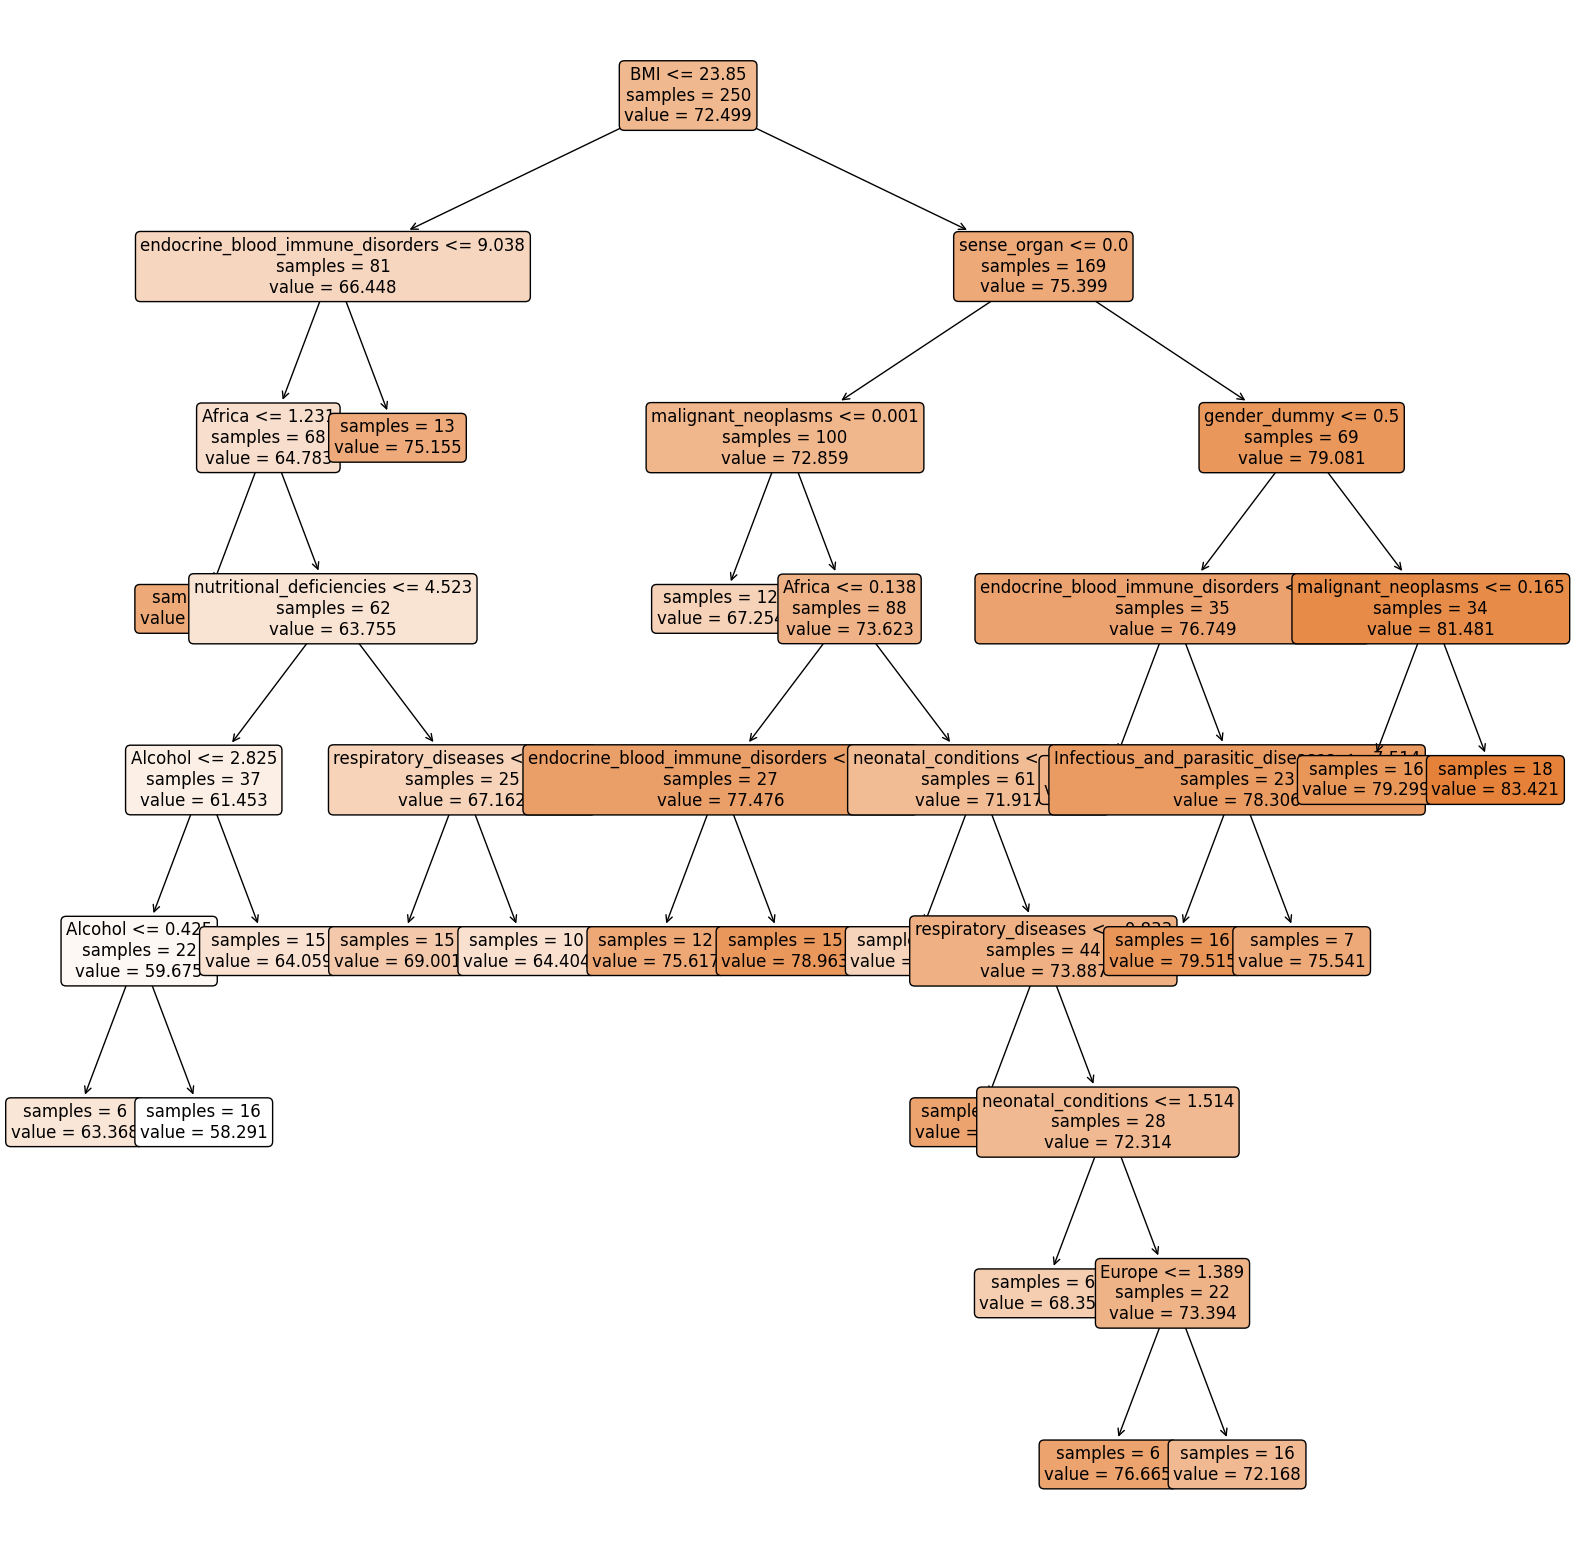

In [147]:
print('Node count =', d_tree_cv.tree_.node_count)
plt.figure(figsize=(20,20))
plot_tree(d_tree_cv, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12)
plt.show()

In [148]:
print('OSR2:', OSR2(d_tree_cv, X_test_noCont, y_test_noCont, y_train_noCont))

OSR2: 0.3791684326255974


In [180]:
rf = RandomForestRegressor()
rf.fit(X_train_noCont, y_train_noCont)

RandomForestRegressor()

In [181]:
y_pred_rf = rf.predict(X_test_noCont)

In [184]:
print('OSR2:', OSR2(rf, X_test_noCont, y_test_noCont, y_train_noCont))

OSR2: 0.7323282001714035


In [109]:
features_rf = rf.feature_names_in_
importance_rf = rf.feature_importances_

In [110]:
for x, y in zip(features_rf, importance_rf):
  print(x, y)

BMI 0.05802414453080385
Alcohol 0.05964955528648424
gender_dummy 0.038105715847378055
Africa 0.35558348929346906
Asia 0.0004246489920713247
Europe 0.001300495603139939
North America 0.0010325959507196676
Oceania 0.027710579266989742
South America 0.001565768091903495
Infectious_and_parasitic_diseases 0.0408424824882475
Respiratory_infectious 0.004091973552146639
neonatal_conditions 0.046069083381797715
nutritional_deficiencies 0.03279385568734715
endocrine_blood_immune_disorders 0.011391974481144042
cardiovascular_disease 0.008552473257501017
respiratory_diseases 0.006225987366476721
digestive_diseases 0.010860760633309314
genitourinary_diseases 0.007342810106920904
malignant_neoplasms 0.03212286506745919
neurological_conditions 0.026369780904761525
unintentional_injuries 0.005809135381765412
intentional_injuries 0.016648827404600774
mental_substance_disorders 0.014165006611800663
sense_organ 0.022419694844517602
musculoskeletal 0.04254445360106028
congenital 0.008350383125502051
sudde

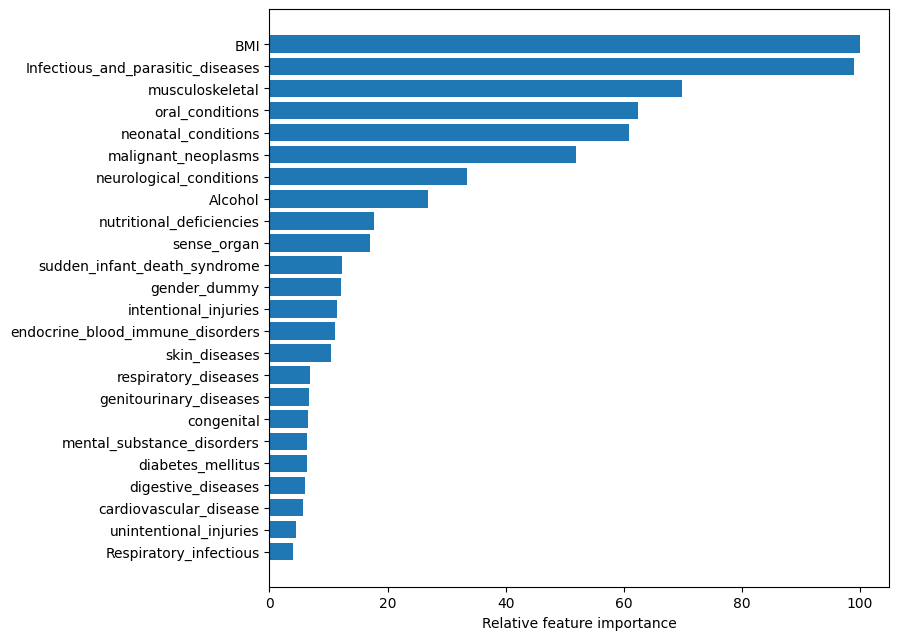

In [150]:
importance_plot(rf, X_train_noCont)

Random Forest for 2000

In [151]:
data = drive.CreateFile({'id':'144tloxFA9tu8jPLbkzb5rGp3udPPvvPC'})
data.GetContentFile('train_2000.csv')
train2000 = pd.read_csv("train_2000.csv")

data = drive.CreateFile({'id':'1iZuOKCzYyrZ8smsNo-R6Sm-zHyzi0QM1'})
data.GetContentFile('test_2000.csv')
test2000 = pd.read_csv("test_2000.csv")

,Life Expectancy at birth,BMI,Alcohol,gender_dummy,Africa,Asia,Europe,North America,Oceania,South America,...,unintentional_injuries,intentional_injuries,mental_substance_disorders,sense_organ,musculoskeletal,congenital,sudden_infant_death_syndrome,skin_diseases,diabetes_mellitus,oral_conditions
0,77.88,26.3,3.920,1,0,0,0,0,0,1,...,2.188341,1.083342,0.047075,0.001041,0.328506,0.966678,0.013614,0.057446,2.368479,0.001745
1,77.88,22.9,2.610,1,1,0,0,0,0,0,...,2.872225,1.255721,0.044205,0.000000,0.052843,1.246507,0.107998,0.080905,1.253812,0.000000
2,64.07,20.5,0.001,0,0,1,0,0,0,0,...,30.674564,8.411972,1.058105,0.000000,0.399760,7.876002,0.397200,0.345806,9.065688,0.000000
3,67.33,19.9,0.730,0,0,1,0,0,0,0,...,26.788541,4.215324,0.924135,0.000000,0.088269,4.009748,0.107356,0.284560,4.899676,0.000000
4,77.14,25.0,9.820,1,0,0,0,0,0,1,...,0.388662,0.190326,0.015814,0.001559,0.042723,0.345987,0.006561,0.014048,0.645182,0.001436


In [161]:
X_train_2000 = train2000.drop(["Oceania", "Africa", "Europe", "North America", "South America", "Asia", "Life Expectancy at birth"], axis=1)
y_train_2000 = train2000["Life Expectancy at birth"]
X_test_2000 = test2000.drop(["Oceania", "Africa", "Europe", "North America", "South America", "Asia", "Life Expectancy at birth"], axis=1)
y_test_2000 = test2000["Life Expectancy at birth"]

In [162]:
rf_2000 = RandomForestRegressor()
rf_2000.fit(X_train_2000, y_train_2000)

print('OSR2:', OSR2(rf_2000, X_test_2000, y_test_2000, y_train_2000))

OSR2: 0.6606099247652166


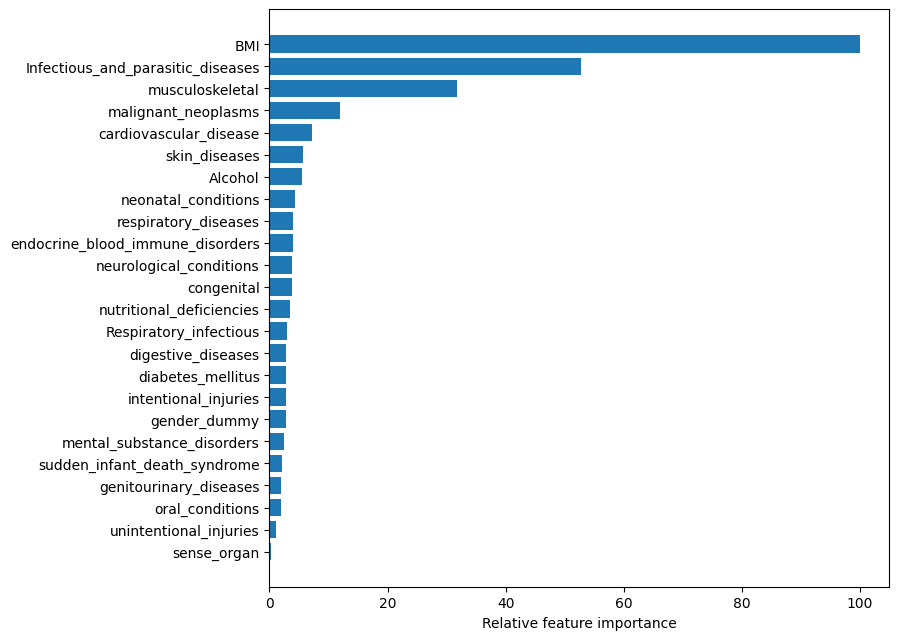

In [163]:
importance_plot(rf_2000, X_train_2000)

Random Forest 2010

In [164]:
data = drive.CreateFile({'id':'1oL_mX3pkT26Y4KC5aUDDv52wYqVfiMpi'})
data.GetContentFile('train_2010.csv')
train2010 = pd.read_csv("train_2010.csv")

data = drive.CreateFile({'id':'1NP_JDsKwX1UYODUbEv9R3RavnqPITdNu'})
data.GetContentFile('test_2010.csv')
test2010 = pd.read_csv("test_2010.csv")

In [165]:
X_train_2010 = train2010.drop(["Oceania", "Africa", "Europe", "North America", "South America", "Asia", "Life Expectancy at birth"], axis=1)
y_train_2010 = train2010["Life Expectancy at birth"]
X_test_2010 = test2010.drop(["Oceania", "Africa", "Europe", "North America", "South America", "Asia", "Life Expectancy at birth"], axis=1)
y_test_2010 = test2010["Life Expectancy at birth"]

In [167]:
rf_2010 = RandomForestRegressor()
rf_2010.fit(X_train_2010, y_train_2010)

print('OSR2:', OSR2(rf_2010, X_test_2010, y_test_2010, y_train_2010))

OSR2: 0.6026575880334248


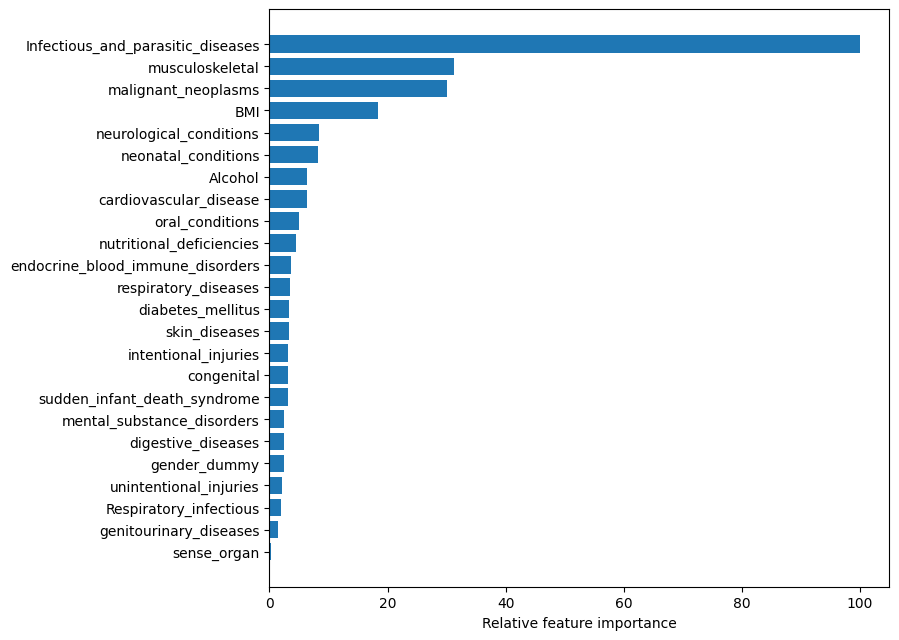

In [168]:
importance_plot(rf_2010, X_train_2010)

Random Forest 2015

In [169]:
data = drive.CreateFile({'id':'1oGSEfAKWG5x46RWJ-FjmJwhTmFRDEZLb'})
data.GetContentFile('train_2015.csv')
train2015 = pd.read_csv("train_2015.csv")

data = drive.CreateFile({'id':'16hlxvIdSBT6mDlfg1mV3W6KAk1krpbRl'})
data.GetContentFile('test_2015.csv')
test2015 = pd.read_csv("test_2015.csv")

In [170]:
X_train_2015 = train2015.drop(["Oceania", "Africa", "Europe", "North America", "South America", "Asia", "Life Expectancy at birth"], axis=1)
y_train_2015 = train2015["Life Expectancy at birth"]
X_test_2015 = test2015.drop(["Oceania", "Africa", "Europe", "North America", "South America", "Asia", "Life Expectancy at birth"], axis=1)
y_test_2015 = test2015["Life Expectancy at birth"]

In [171]:
rf_2015 = RandomForestRegressor()
rf_2015.fit(X_train_2015, y_train_2015)

print('OSR2:', OSR2(rf_2015, X_test_2015, y_test_2015, y_train_2015))

OSR2: 0.7564223445576235


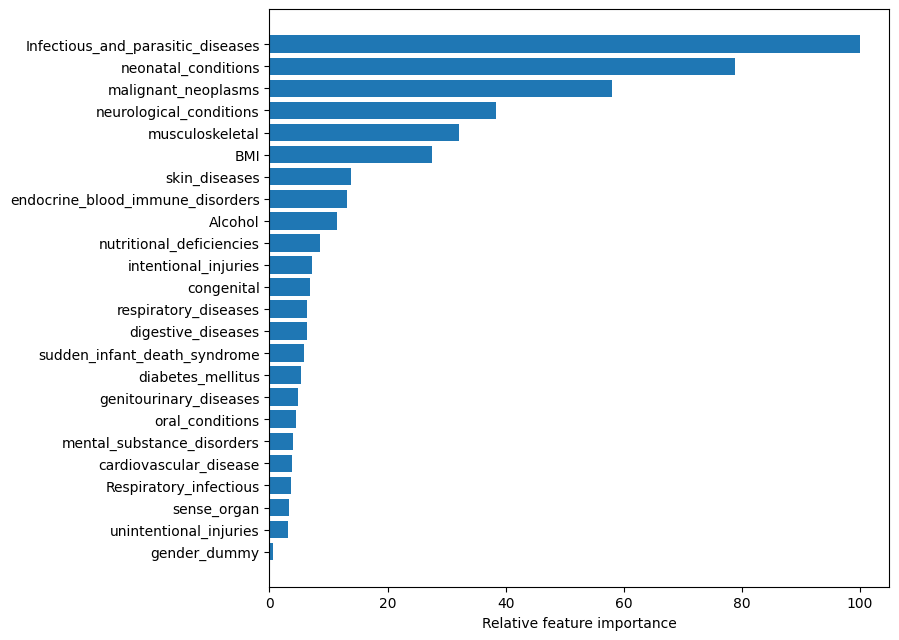

In [172]:
importance_plot(rf_2015, X_train_2015)

In [188]:
# calculate Variance Inflation Factor for each explanatory variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# The dataframe passed to VIF must include the intercept term. We add it the same way we did before.
def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)

In [189]:
cols = X_train.columns
VIF(X_train, cols)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


BMI                                    2.217854
Alcohol                                1.633531
gender_dummy                           1.374245
Africa                                      inf
Asia                                        inf
Europe                                      inf
North America                               inf
Oceania                                     inf
South America                               inf
Infectious_and_parasitic_diseases    133.793986
Respiratory_infectious                77.558409
neonatal_conditions                   92.488822
nutritional_deficiencies              10.261029
endocrine_blood_immune_disorders      17.968330
cardiovascular_disease               257.384549
respiratory_diseases                 316.734414
digestive_diseases                    75.118076
genitourinary_diseases               208.542017
malignant_neoplasms                  101.763962
neurological_conditions               22.756743
unintentional_injuries               228

BMI                                    1.480212
Alcohol                                1.338675
gender_dummy                           1.334546
Infectious_and_parasitic_diseases    130.590014
Respiratory_infectious                75.181443
neonatal_conditions                   82.943061
nutritional_deficiencies               9.507699
endocrine_blood_immune_disorders      17.227818
cardiovascular_disease               240.450822
respiratory_diseases                 304.729537
digestive_diseases                    74.306635
genitourinary_diseases               205.087732
malignant_neoplasms                  101.132149
neurological_conditions               22.668728
unintentional_injuries               227.726040
intentional_injuries                  14.782928
mental_substance_disorders            15.375330
sense_organ                            5.276092
musculoskeletal                       49.863314
congenital                            92.234555
sudden_infant_death_syndrome          29